In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


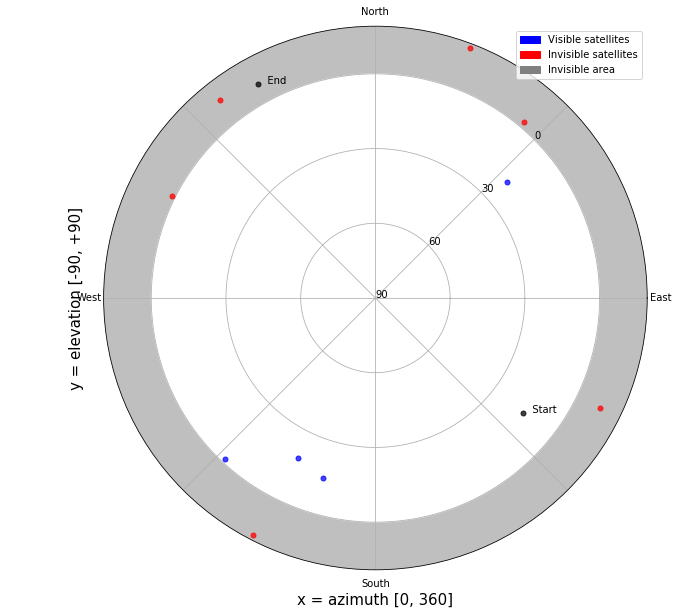

In [3]:
from tracker import plotter

n = 12
az = np.random.uniform(size=n) * 360.0
el = np.random.uniform(low=-1.0, high=1.0, size=n) * 20

plotter.plot_az_el(az, el)
plt.show()

In [4]:
from tracker.tle_getter import get_tle, get_az_el

OBS_LAT = -15.989620
OBS_LON = -48.044411
OBS_ALT = 500 # meters


ISS_TLE = ('1 25544U 98067A   18264.87214538 -.00000479 +00000-0 +00000-0 0 9990',
           '2 25544 051.6411 256.8919 0004651 185.2142 246.8508 15.53744581133552')
ISS_TLE = get_tle(name='ISS')
print('ISS_TLE = {}'.format(ISS_TLE))

ISS_TLE = ('1 25544U 98067A   18298.72261574 +.00001440 +00000-0 +29255-4 0  9998', '2 25544 051.6408 088.2199 0003908 337.0884 208.0938 15.53862152138815')


In [5]:
from tracker.satellite import Satellite
from datetime import datetime, timezone

iss = Satellite(ISS_TLE[0], ISS_TLE[1])
utc_satview = datetime(year=2018,
                       month=10,
                       day=10,
                       hour=22,
                       minute=1,
                       second=35,
                       tzinfo=timezone.utc)

iss_position, v = iss.propagate(utc_satview)

print('iss_position = {}'.format(iss_position))
b = (768350.0713588104, 6538760.196343955, -1632694.711713458)

print(iss_position == b)

iss_position = (1536696.4125057778, -4512932.993530591, 4821047.836825612)
False


In [6]:
def get_row(satview_az, satview_el, sat, lat, lon, alt, date):
    az, el = sat.get_observer_azimuth_elevation(lat, lon, alt, date=date)
    return [satview_az, satview_el, az, el, date]

In [7]:
rows = []

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=3,
                       second=58,
                       tzinfo=timezone.utc)
rows.append(get_row(137.88, -44.77, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=46,
                       second=34,
                       tzinfo=timezone.utc)
rows.append(get_row(317.97, -51.94, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=51,
                       second=13,
                       tzinfo=timezone.utc)
rows.append(get_row(313.60, -43.08, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=52,
                       second=53,
                       tzinfo=timezone.utc)
rows.append(get_row(311.97, -39.89, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=55,
                       second=27,
                       tzinfo=timezone.utc)
rows.append(get_row(309.25, -34.94, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

In [8]:

df_comparison = pd.DataFrame(rows, columns=['SatView azimuth', 'SatView elevation', 'Calculated azimuth', 'Calculated elevation', 'Date'])
df_comparison['Azimuth error'] = (df_comparison['SatView azimuth'] - df_comparison['Calculated azimuth']).abs()
df_comparison['Elevation error'] = (df_comparison['SatView elevation'] - df_comparison['Calculated elevation']).abs()
column_order = ['SatView azimuth', 'SatView elevation', 'Calculated azimuth',
       'Calculated elevation', 'Azimuth error', 'Elevation error', 'Date', ]

df_comparison = df_comparison[column_order]
display(df_comparison)
pd.options.display.float_format = '${:,.2f}'.format

values = df_comparison.values

,SatView azimuth,SatView elevation,Calculated azimuth,Calculated elevation,Azimuth error,Elevation error,Date
0,137.88,-44.77,137.376584,-45.217565,0.503416,0.447565,2018-10-20 22:03:58+00:00
1,317.97,-51.94,317.439564,-52.435784,0.530436,0.495784,2018-10-20 22:46:34+00:00
2,313.60,-43.08,313.079472,-43.568652,0.520528,0.488652,2018-10-20 22:51:13+00:00
3,311.97,-39.89,311.441823,-40.369732,0.528177,0.479732,2018-10-20 22:52:53+00:00
4,309.25,-34.94,308.730825,-35.415251,0.519175,0.475251,2018-10-20 22:55:27+00:00


In [9]:
def dataframe_to_latex(df):
    values = df.values
    for r in values:
        for i, x in enumerate(r):
            if i > 0:
                print(' & ', end='')
            if isinstance(x, datetime):
                print(x.strftime('%d/%m/%Y %H:%M:%S'), end='')
            else:
                print('{:.2f}'.format(x), end='')
        print(' \\\\ \\hline')
dataframe_to_latex(df_comparison)

137.88 & -44.77 & 137.38 & -45.22 & 0.50 & 0.45 & 20/10/2018 22:03:58 \\ \hline
317.97 & -51.94 & 317.44 & -52.44 & 0.53 & 0.50 & 20/10/2018 22:46:34 \\ \hline
313.60 & -43.08 & 313.08 & -43.57 & 0.52 & 0.49 & 20/10/2018 22:51:13 \\ \hline
311.97 & -39.89 & 311.44 & -40.37 & 0.53 & 0.48 & 20/10/2018 22:52:53 \\ \hline
309.25 & -34.94 & 308.73 & -35.42 & 0.52 & 0.48 & 20/10/2018 22:55:27 \\ \hline


# Erro médio

In [10]:
df_err = df_comparison[['Azimuth error', 'Elevation error']].describe()
df_err.drop(['count', 'min', '25%', '50%', '75%'], inplace=True)
display(df_err)

,Azimuth error,Elevation error
mean,$0.52,$0.48
std,$0.01,$0.02
max,$0.53,$0.50


Step = 2
plotted points between [2018-10-01 14:57:00+00:00] and [2018-10-01 15:30:18+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


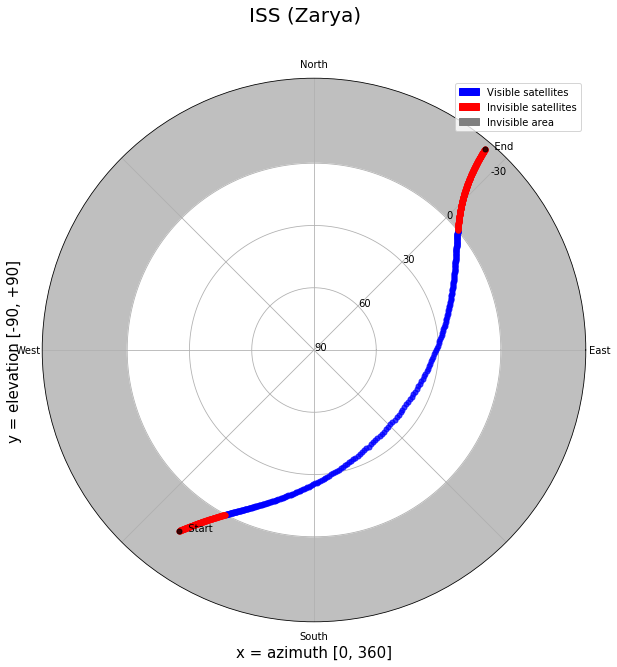

,Azimuth,Elevation,Date
0,$216.72,$-18.66,2018-10-01 14:57:00+00:00
1,$216.69,$-18.58,2018-10-01 14:57:02+00:00
2,$216.67,$-18.51,2018-10-01 14:57:04+00:00
3,$216.65,$-18.43,2018-10-01 14:57:06+00:00
4,$216.62,$-18.36,2018-10-01 14:57:08+00:00
5,$216.60,$-18.28,2018-10-01 14:57:10+00:00
6,$216.57,$-18.21,2018-10-01 14:57:12+00:00
7,$216.55,$-18.14,2018-10-01 14:57:14+00:00
8,$216.53,$-18.06,2018-10-01 14:57:16+00:00
9,$216.50,$-17.99,2018-10-01 14:57:18+00:00


In [11]:
from datetime import timedelta

start = datetime(year=2018,
                 month=10,
                 day=1,
                 hour=11,
                 minute=57,
                 second=0,
                 tzinfo=timezone.utc)
start += timedelta(hours=3)

end = start + timedelta(seconds=2000)
df = plotter.see_satellite(iss, OBS_LAT, OBS_LON, OBS_ALT, start=start, end=end, count=1000, annotate=False, title='ISS (Zarya)')
plt.show()
display(df)

Step = 1
plotted points between [2018-10-30 17:40:00+00:00] and [2018-10-30 18:40:00+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


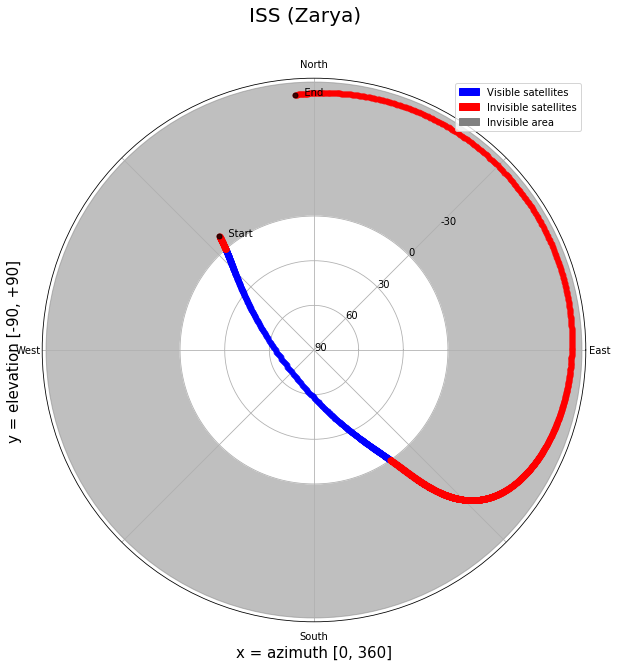

,Azimuth,Elevation,Date
0,$320.24,$-9.32,2018-10-30 17:40:00+00:00
1,$320.24,$-9.28,2018-10-30 17:40:01+00:00
2,$320.23,$-9.23,2018-10-30 17:40:02+00:00
3,$320.23,$-9.19,2018-10-30 17:40:03+00:00
4,$320.22,$-9.14,2018-10-30 17:40:04+00:00
5,$320.22,$-9.10,2018-10-30 17:40:05+00:00
6,$320.21,$-9.05,2018-10-30 17:40:06+00:00
7,$320.21,$-9.01,2018-10-30 17:40:07+00:00
8,$320.20,$-8.96,2018-10-30 17:40:08+00:00
9,$320.19,$-8.92,2018-10-30 17:40:09+00:00


In [12]:
from datetime import timedelta

start = datetime(year=2018,
                 month=10,
                 day=30,
                 hour=14,
                 minute=40,
                 second=0,
                 tzinfo=timezone.utc)
start += timedelta(hours=3)

end = start + timedelta(seconds=3600)
df = plotter.see_satellite(iss, OBS_LAT, OBS_LON, OBS_ALT, start=start, end=end, count=10000, annotate=False, title='ISS (Zarya)')
plt.show()
display(df)

2018-10-27 04:07:03+00:00
Step = 24
plotted points between [2018-10-26 04:07:03+00:00] and [2018-10-27 04:06:39+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


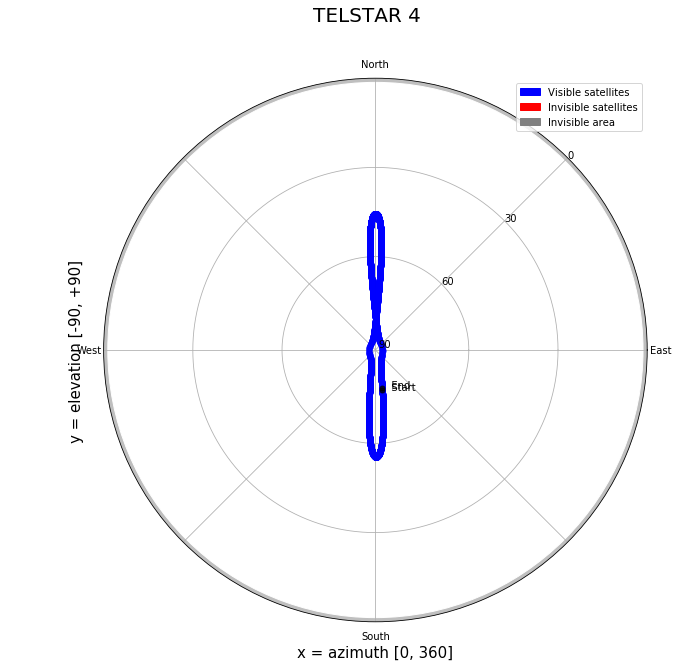

,Azimuth,Elevation,Date
0,$170.70,$77.68,2018-10-26 04:07:03+00:00
1,$170.67,$77.75,2018-10-26 04:07:27+00:00
2,$170.63,$77.82,2018-10-26 04:07:51+00:00
3,$170.60,$77.89,2018-10-26 04:08:15+00:00
4,$170.57,$77.95,2018-10-26 04:08:39+00:00


In [40]:
def plot_sat(name, tle1, tle2, obs_lat, obs_lon, obs_alt, start=None, end=None):
    if start is None:
        start = datetime.now(timezone.utc)
        print(start)
    if end is None:
        end = start + timedelta(seconds=3600 * 24)
        print(end)
    
    sat = Satellite(tle1, tle2)
    df = plotter.see_satellite(sat, obs_lat, obs_lon, obs_alt, start=start, end=end, count=3600, annotate=False, title=name)
    plt.show()
    display(df.head())
    
start = datetime(year=2018,
                 month=10,
                 day=26,
                 hour=4,
                 minute=7,
                 second=3,
                 tzinfo=timezone.utc)

plot_sat('TELSTAR 4',
         '1 23670U 95049A   18297.32130323 -.00000194 +00000-0 +00000-0 0  9994',
         '2 23670 011.3140 032.7443 0005992 252.2037 133.9454 01.00279297084502',
         -1.752453,
         -89.445483,
         2.5 * 10**7,
         start=start)

Step = 3
plotted points between [2018-09-25 17:25:40+00:00] and [2018-09-25 20:25:37+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


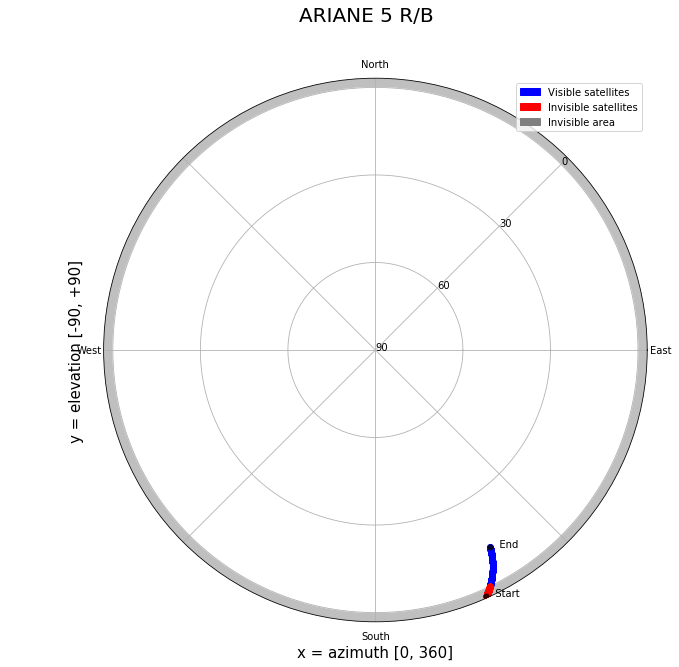

,Azimuth,Elevation,Date
0,$155.69,$-2.44,2018-09-25 17:25:40+00:00
1,$155.69,$-2.44,2018-09-25 17:25:43+00:00
2,$155.69,$-2.43,2018-09-25 17:25:46+00:00
3,$155.68,$-2.43,2018-09-25 17:25:49+00:00
4,$155.68,$-2.42,2018-09-25 17:25:52+00:00


In [19]:
start = datetime(year=2018,
                 month=9,
                 day=25,
                 hour=17,
                 minute=25,
                 second=40,
                 tzinfo=timezone.utc)
end = start + timedelta(hours=3)

plot_sat('ARIANE 5 R/B',
         '1 25990U 99066B   18263.95148864 -.00000062  00000-0  00000+0 0  9998',
         '2 25990  61.8726  65.7628 7857263  80.4884   0.5357  0.55293909 25729',
         -15.995,
         -48.047,
         1201,
         start=start,
         end=end)

In [20]:
telstar4_az, telstar4_el, telstar4_at = get_az_el(-1.752453, -89.445483, 0, name='TELSTAR4', seconds=10000)
print(telstar4_el)
telstar4_points = pd.DataFrame({'TELSTAR4-402R azimuth': telstar4_az,
                                'TELSTAR4-402R elevation': telstar4_el,
                                'TELSTAR4-402R dates': telstar4_at,})
display(telstar4_points.head())

[87.05, 87.05, 87.04, 87.04, 87.04, 87.04, 87.04, 87.04, 87.04, 87.04, 87.04, 87.04, 87.04, 87.03, 87.03, 87.03, 87.03, 87.03, 87.03, 87.03, 87.03, 87.03, 87.03, 87.02, 87.02, 87.02, 87.02, 87.02, 87.02, 87.02, 87.02, 87.02, 87.02, 87.02, 87.01, 87.01, 87.01, 87.01, 87.01, 87.01, 87.01, 87.01, 87.01, 87.01, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 86.99, 86.99, 86.99, 86.99, 86.99, 86.99, 86.99, 86.99, 86.99, 86.99, 86.99, 86.98, 86.98, 86.98, 86.98, 86.98, 86.98, 86.98, 86.98, 86.98, 86.98, 86.97, 86.97, 86.97, 86.97, 86.97, 86.97, 86.97, 86.97, 86.97, 86.97, 86.97, 86.96, 86.96, 86.96, 86.96, 86.96, 86.96, 86.96, 86.96, 86.96, 86.96, 86.95, 86.95, 86.95, 86.95, 86.95, 86.95, 86.95, 86.95, 86.95, 86.95, 86.94, 86.94, 86.94, 86.94, 86.94, 86.94, 86.94, 86.94, 86.94, 86.94, 86.94, 86.93, 86.93, 86.93, 86.93, 86.93, 86.93, 86.93, 86.93, 86.93, 86.93, 86.92, 86.92, 86.92, 86.92, 86.92, 86.92, 86.92, 86.92, 86.92, 86.92, 86.92, 86.91, 86.91, 86.91, 86.91, 86.91, 86.91, 86.91, 86.91, 86.91, 

,TELSTAR4-402R azimuth,TELSTAR4-402R elevation,TELSTAR4-402R dates
0,$0.15,$87.05,2018-10-26 06:05:14+00:00
1,$0.14,$87.05,2018-10-26 06:05:15+00:00
2,$0.14,$87.04,2018-10-26 06:05:16+00:00
3,$0.14,$87.04,2018-10-26 06:05:17+00:00
4,$0.14,$87.04,2018-10-26 06:05:18+00:00


In [16]:
def degrees_error(deg1, deg2):
    err = abs(deg1 - deg2)
    if err > 180.0:
        err = 360.0 - err
    return err

In [21]:
telstar402r_tle = get_tle(name='TELSTAR4')
telstar = Satellite(*telstar402r_tle)
az_errors = []
el_errors = []

for i in range(len(telstar4_az)):
    az, el = telstar.get_observer_azimuth_elevation(-1.752453, -89.445483, 0, date = telstar4_at[i])
    az_errors.append(degrees_error(az, telstar4_az[i]))
    el_errors.append(degrees_error(el, telstar4_el[i]))

telstar_errors = pd.DataFrame({'azimuth': az_errors, 'elevation': el_errors})
display(telstar_errors.head())

display(telstar_errors.describe())

,azimuth,elevation
0,$0.10,$0.00
1,$0.09,$0.00
2,$0.09,$0.01
3,$0.09,$0.00
4,$0.09,$0.00


,azimuth,elevation
count,"$10,000.00","$10,000.00"
mean,$0.04,$0.00
std,$0.02,$0.00
min,$0.02,$0.00
25%,$0.03,$0.00
50%,$0.04,$0.00
75%,$0.05,$0.00
max,$0.10,$0.01


Step = 2
plotted points between [2018-10-26 06:05:14+00:00] and [2018-10-26 08:05:12+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


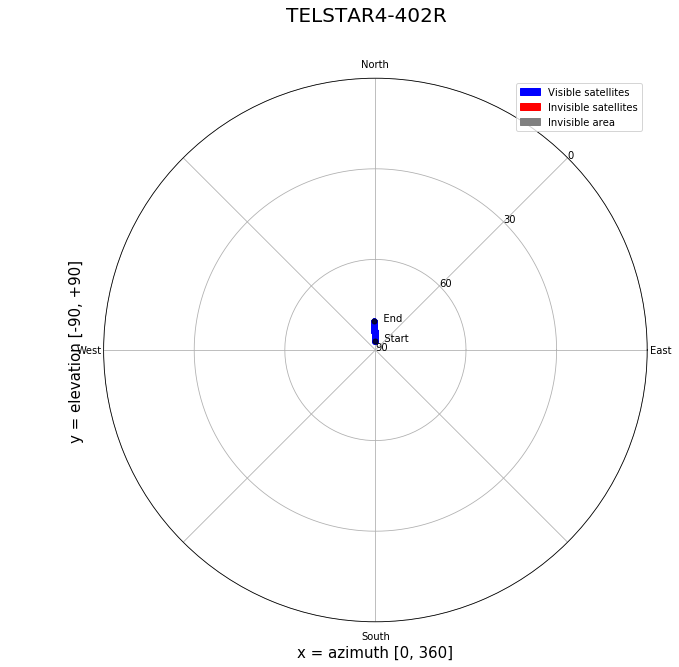

,Azimuth,Elevation,Date
0,$0.05,$87.05,2018-10-26 06:05:14+00:00
1,$0.05,$87.05,2018-10-26 06:05:16+00:00
2,$0.05,$87.04,2018-10-26 06:05:18+00:00
3,$0.04,$87.04,2018-10-26 06:05:20+00:00
4,$0.04,$87.04,2018-10-26 06:05:22+00:00


In [22]:
start = datetime(year=2018,
                 month=9,
                 day=25,
                 hour=17,
                 minute=25,
                 second=40,
                 tzinfo=timezone.utc)
end = start + timedelta(hours=2)

plot_sat('TELSTAR4-402R',
         *telstar402r_tle,
         -1.752453,
         -89.445483,
         0,
         start=telstar4_at[0],
         end=telstar4_at[-1])

Step = 5
plotted points between [2018-10-26 06:25:41+00:00] and [2018-10-26 11:25:36+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


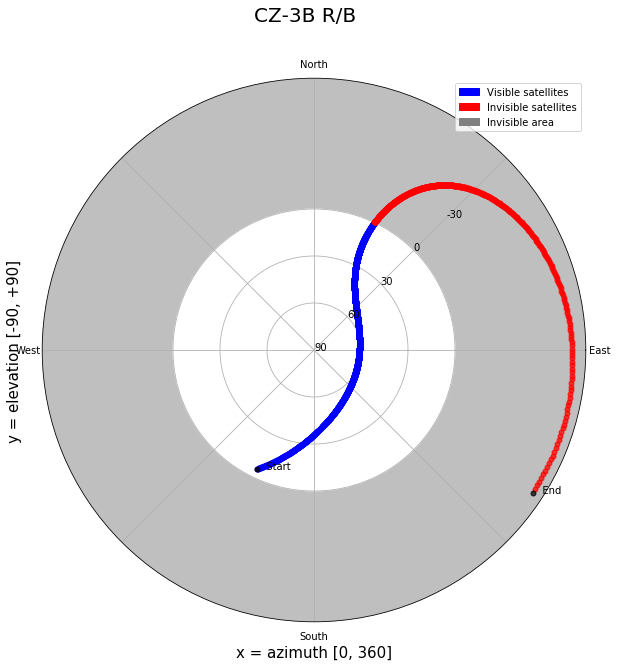

,Azimuth,Elevation,Date
0,$205.64,$5.68,2018-10-26 06:25:41+00:00
1,$205.50,$5.89,2018-10-26 06:25:46+00:00
2,$205.35,$6.10,2018-10-26 06:25:51+00:00
3,$205.21,$6.32,2018-10-26 06:25:56+00:00
4,$205.06,$6.53,2018-10-26 06:26:01+00:00


In [29]:
cz3b_id = 43624
cz3b_tle = get_tle(norad_id=cz3b_id)

start = datetime(year=2018,
                 month=10,
                 day=26,
                 hour=6,
                 minute=25,
                 second=41,
                 tzinfo=timezone.utc)

end = datetime(year=2018,
                 month=10,
                 day=26,
                 hour=11,
                 minute=25,
                 second=41,
                 tzinfo=timezone.utc)

plot_sat('CZ-3B R/B',
         *cz3b_tle,
         -15.989620,
         -48.044411,
         500,
         start=start,
         end=end)